In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy import misc
from skimage import data
from skimage import io
from PIL import Image
import skimage.color

In [2]:
boxes = [100,88,253,209]
img = mpimg.imread('bPawn0.jpg')

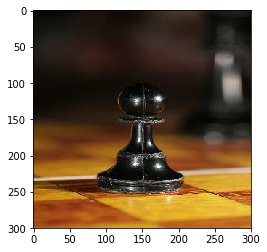

In [3]:
plt.imshow(img.reshape(300,300,3))
plt.show()

In [4]:
box = np.ones([1,1,4])

In [5]:
for i in range(4):
    box[:,:,i] = boxes[i]/300

In [6]:
img = img.reshape(1,300,300,3)

In [7]:
img = tf.convert_to_tensor(img, np.float32)

In [8]:
box = tf.convert_to_tensor(box, np.float32)

In [9]:
test = tf.image.draw_bounding_boxes(img, box)

In [10]:
sess = tf.Session()

In [11]:
image = (sess.run(test).reshape(300,300,3))
image = misc.toimage(image)

/home/justin/envs/ml/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


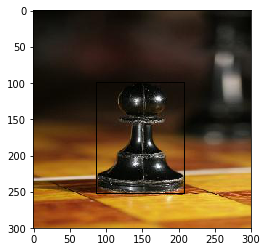

In [12]:
plt.imshow(image)

In [13]:
img = tf.reshape(img,[300,300,3])
begin, size, crop_box = sess.run(tf.image.sample_distorted_bounding_box(
    image_size = tf.shape(img),
    bounding_boxes=box,
    min_object_covered=0.25,
    aspect_ratio_range=[0.75, 1.33],
    area_range=[0.5, .8],
    max_attempts=100,
    use_image_if_no_bounding_boxes=False))

In [14]:
boxes = tf.stack([box,crop_box], axis=2)

In [15]:
image_with_box = tf.image.draw_bounding_boxes(tf.expand_dims(img, 0),
                                                  boxes[-1,:,:,:])
tf.summary.image ('images_with_box', image_with_box)

<tf.Tensor 'images_with_box:0' shape=() dtype=string>

/home/justin/envs/ml/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


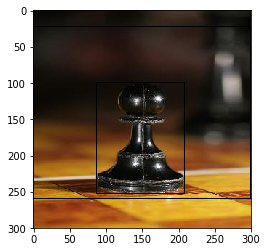

In [16]:
image = sess.run(image_with_box)[-1,:,:,:]
image = misc.toimage(image)
plt.imshow(image)
plt.show()

In [17]:
old_box = sess.run(box)
print(old_box)

[[[0.33333334 0.29333332 0.8433333  0.69666666]]]


In [18]:
crop_box

array([[[0.07666667, 0.        , 0.8666667 , 1.        ]]], dtype=float32)

In [19]:
new_box = np.zeros([1,1,4])

if crop_box[:,:,0] > old_box[:,:,0]:
    new_box[:,:,0] = 0
else:
    new_box[:,:,0] = (old_box[:,:,0] - crop_box[:,:,0]) / (crop_box[:,:,2] - crop_box[:,:,0])

if crop_box[:,:,2] < old_box[:,:,2]:
    new_box[:,:,2] = 1
else:
    new_box[:,:,2] = (old_box[:,:,2] - crop_box[:,:,0]) / (crop_box[:,:,2] - crop_box[:,:,0])
    
if crop_box[:,:,1] > old_box[:,:,1]:
    new_box[:,:,1] = 0
else:
    new_box[:,:,1] = (old_box[:,:,1] - crop_box[:,:,1]) / (crop_box[:,:,3] - crop_box[:,:,1])

if crop_box[:,:,3] < old_box[:,:,3]:
    new_box[:,:,3] = 1
else:
    new_box[:,:,3] = (old_box[:,:,3] - crop_box[:,:,1]) / (crop_box[:,:,3] - crop_box[:,:,1])

In [20]:
new_box

array([[[0.32489449, 0.29333332, 0.97046411, 0.69666666]]])

In [21]:
box = tf.convert_to_tensor(new_box, np.float32)

In [22]:
distorted_image = sess.run(tf.slice(img, begin, size))

In [23]:
img = np.expand_dims(distorted_image, axis=0)

In [24]:
distorted_with_box = tf.image.draw_bounding_boxes(img,box)

In [25]:
image = (sess.run(distorted_with_box))
image = misc.toimage(image[-1,:,:,:])

/home/justin/envs/ml/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


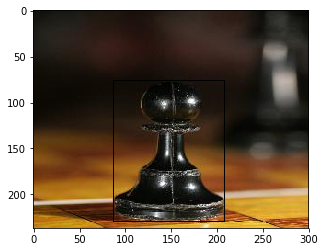

In [26]:
plt.imshow(image)
plt.show()